## UCSD Nano 106, Spring 2014 — Crystallography of Materials

modified from Prof. Shyue Ping Ong.  Uses Kernel 2.7.x

#### Problem Set 4, Question 6.
The perovskite crystal structure is an important class of materials with many technological applications. PbTiO<sub></sub> is an important ferroelectric material that crystallizes in a tetragonal form of this crystal structure. According to an experimental entry in the ICSD, PbTiO<sub></sub> has spacegroup P4mm (99) and lattice parameters {3.9039, 3.9039, 4.1348, 90, 90, 90} and atomic positions:

| Species | Wyckoff Symbol | x   | y   | z      |
|---------|----------------|-----|-----|--------|
| Pb      | 1a             | 0   | 0   | 0      |
| Ti      | 1b             | 0.5 | 0.5 | 0.5281 |
| O       | 2c             | 0.5 | 0   | 0.6130 |
| O       | 1b             | 0.5 | 0.5 | 0.1339 |

**a.** Write the reciprocal lattice basis vectors for perovskite PbTiO<sub></sub> in terms of the crystal basis vectors **e<sub>x</sub>**, **e<sub>y</sub>**, **e<sub>z</sub>**.

**b.** Determine the Bragg angles for the (011), (010), and (001) planes.

**c.** Calculate the structure factors and intensities for the peaks for the (011), (010), and (001) reflections.  The atomic scattering parameter given for the elements are listed below.  Ignore Lorentz polarization factors, multiplicites or other correction factors.

| Species | Z  | a1    | b1     | a2    | b2     | a3    | b3    | a4    | b4    |
|---------|----|-------|--------|-------|--------|-------|-------|-------|-------|
| Pb      | 82 | 3.510 | 52.914 | 4.552 | 11.884 | 3.154 | 2.571 | 1.359 | 0.321 |
| Ti      | 22 | 3.565 | 81.982 | 2.818 | 19.049 | 1.893 | 3.590 | 0.483 | 0.386 |
| O       | 8  | 0.455 | 23.780 | 0.917 | 7.622  | 0.472 | 2.144 | 0.138 | 0.296 |

**d.** Discuss how the Lorentz polarization factors will change the relative peak intensities for the (001) and (011) reflections, i.e. I<sub>011</sub>/I<sub>001</sub>

---

## a)

The reciprocal basis vectors are given by

$\mathbf{e_x'} = \frac{\mathbf{e_x}}{a}$

$\mathbf{e_y'} = \frac{\mathbf{e_y}}{a}$

$\mathbf{e_z'} = \frac{\mathbf{e_z}}{c}$

___

## b)

The Bragg condition is given by $2d_{hkl}\sin\theta = \lambda$.
Since we know that $d_{hkl} = \frac{1}{|\mathbf{g_{hkl}}|}$, we have

$\theta = \sin^{-1}(\frac{\lambda |\mathbf{g_{hkl}}|}{2})$

Also, because the reciprocal basis vectors are mutually orthgonal, we have the lengths simply as

$|\mathbf{g_{hkl}}| = (h^2/a^2 + k^2/a^2 + l^2 / c^2)^{1/2}$

In [2]:
import math

a = 3.9039
c = 4.1348

def calculate_two_theta(hkl):
    two_theta = 2 * math.asin(1.541 * (hkl[0] / a ** 2 + hkl[1] / a ** 2 + hkl[2] / c ** 2) ** 0.5 / 2)
    return math.degrees(two_theta)

two_thetas = {}
for hkl in [(0, 1, 1), (0, 1, 0), (0, 0, 1)]:
    two_theta = calculate_two_theta(hkl)
    print "Peak position for %s is %.1f degrees" % (hkl, two_theta)
    #Store this as we will use these later.
    two_thetas[hkl] = two_theta

Peak position for (0, 1, 1) is 31.5 degrees
Peak position for (0, 1, 0) is 22.8 degrees
Peak position for (0, 0, 1) is 21.5 degrees


---

## c)

To calculate the structure factor, we need the positions of all atoms in the unit cell. Note that one of the oxygen has Wyckoff symbol 2c. From the International Tables, we find that the orbit for this site is given by (1/2, 0, z) and (0, 1/2, z). So there are 5 atoms in the cell with positions:

In [3]:
elements = ["Pb", "Ti", "O", "O", "O"]

coords = [
    [0, 0, 0], 
    [0.5, 0.5, 0.5281],
    [0.5, 0, 0.6130], 
    [0, 0.5, 0.6130], 
    [0.5, 0.5, 0.1339]
]

#We will also set up the parameters for the atomic scattering factors

asf_params = {
    "Pb": [82, 3.510, 52.914, 4.552, 11.884, 3.154, 2.571, 1.359, 0.321],
    "Ti": [22, 3.565, 81.982, 2.818, 19.049, 1.893, 3.590, 0.483, 0.386],
    "O": [8, 0.455, 23.780, 0.917, 7.622, 0.472, 2.144, 0.138, 0.296]
}

The atomic scattering factor is given by:

$f(s) = Z - 41.78214 s^2 \sum(a_i e ^ {-b_i s^2})$

In [4]:
wavelength = 1.541 / 10 #Convert to nm

#Let's write a function to calculate the atomic scattering factor for a given element and angle. 
def get_atomic_scattering_factor(el, two_theta):
    params = asf_params[el]
    theta = math.radians(two_theta / 2)
    s = math.sin(theta) / wavelength
    return params[0] - 41.78214 * s ** 2 * sum([params[2*i + 1] * math.exp(-params[2*i + 2] * s ** 2) for i in xrange(4)])

The structure factor is given by the sum of the atomic scattering factor times the position factor.

$F_{hkl} = \sum f_j(s) \exp(2\pi i (hx_j + ky_j + lz_j))$

and the intensity is simply given by the modulus squared of the structure factor.

In [5]:
import cmath # We need complex representation for this.

I = {}

for hkl in [(0, 1, 1), (0, 1, 0), (0, 0, 1)]:
    F_hkl = 0
    two_theta = two_thetas[hkl]
    h, k, l = hkl
    for el, coord in zip(elements, coords):
        x, y, z = coord
        F_hkl += get_atomic_scattering_factor(el, two_theta) * cmath.exp(2j * math.pi * (h * x + k * y + l * z))
    print "Structure factor for %s = %s" % (hkl, str(F_hkl))
    I_hkl = (F_hkl * F_hkl.conjugate()).real
    I[hkl] = I_hkl
    print "Intensity for %s = %.0f" % (hkl, I_hkl)

Structure factor for (0, 1, 1) = (19.3103357104-0.0383753645865j)
Intensity for (0, 1, 1) = 373
Structure factor for (0, 1, 0) = (18.5158066944+7.96497645578e-16j)
Intensity for (0, 1, 0) = 343
Structure factor for (0, 0, 1) = (19.9607043933-1.52195300723j)
Intensity for (0, 0, 1) = 401


---

## Part d

The Lorentz polarization factor has the form 

$L_p(\theta) = \frac{1 + \cos^22\theta}{\sin^2\theta cos \theta}$

In [5]:
lp = {}
for hkl in [(0, 1, 1), (0, 0, 1)]:
    theta = math.radians(two_thetas[hkl] / 2)
    lp[hkl] = (1 + math.cos(2 * theta) ** 2) / (math.sin(theta) ** 2 * math.cos(theta))
    print "Lorentz factor for %s = %.3f" % (hkl, lp[hkl])

Lorentz factor for (0, 1, 1) = 24.354
Lorentz factor for (0, 0, 1) = 54.693


In [6]:
print "Before correction, we have I_011/I_001 = %.4f" % (I[(0, 1, 1)]/I[(0, 0, 1)])
print "After correction, we have I_011/I_001 = %.4f" % (I[(0, 1, 1)] * lp[(0, 1, 1)] / (I[(0, 0, 1)]* lp[(0, 0, 1)]))

Before correction, we have I_011/I_001 = 0.9305
After correction, we have I_011/I_001 = 0.4143


Clearly, the Lorentz polarization factor has a significant impact on relative peak intensities! In this case, the relative peak intensity has decreased significantly. If you look at the experiment XRD pattern below, clearly the relative intensity is a lot closer to 0.4143 than 0.9305. The relative intensities are still wrong because there are other factors which have not been taken into account.

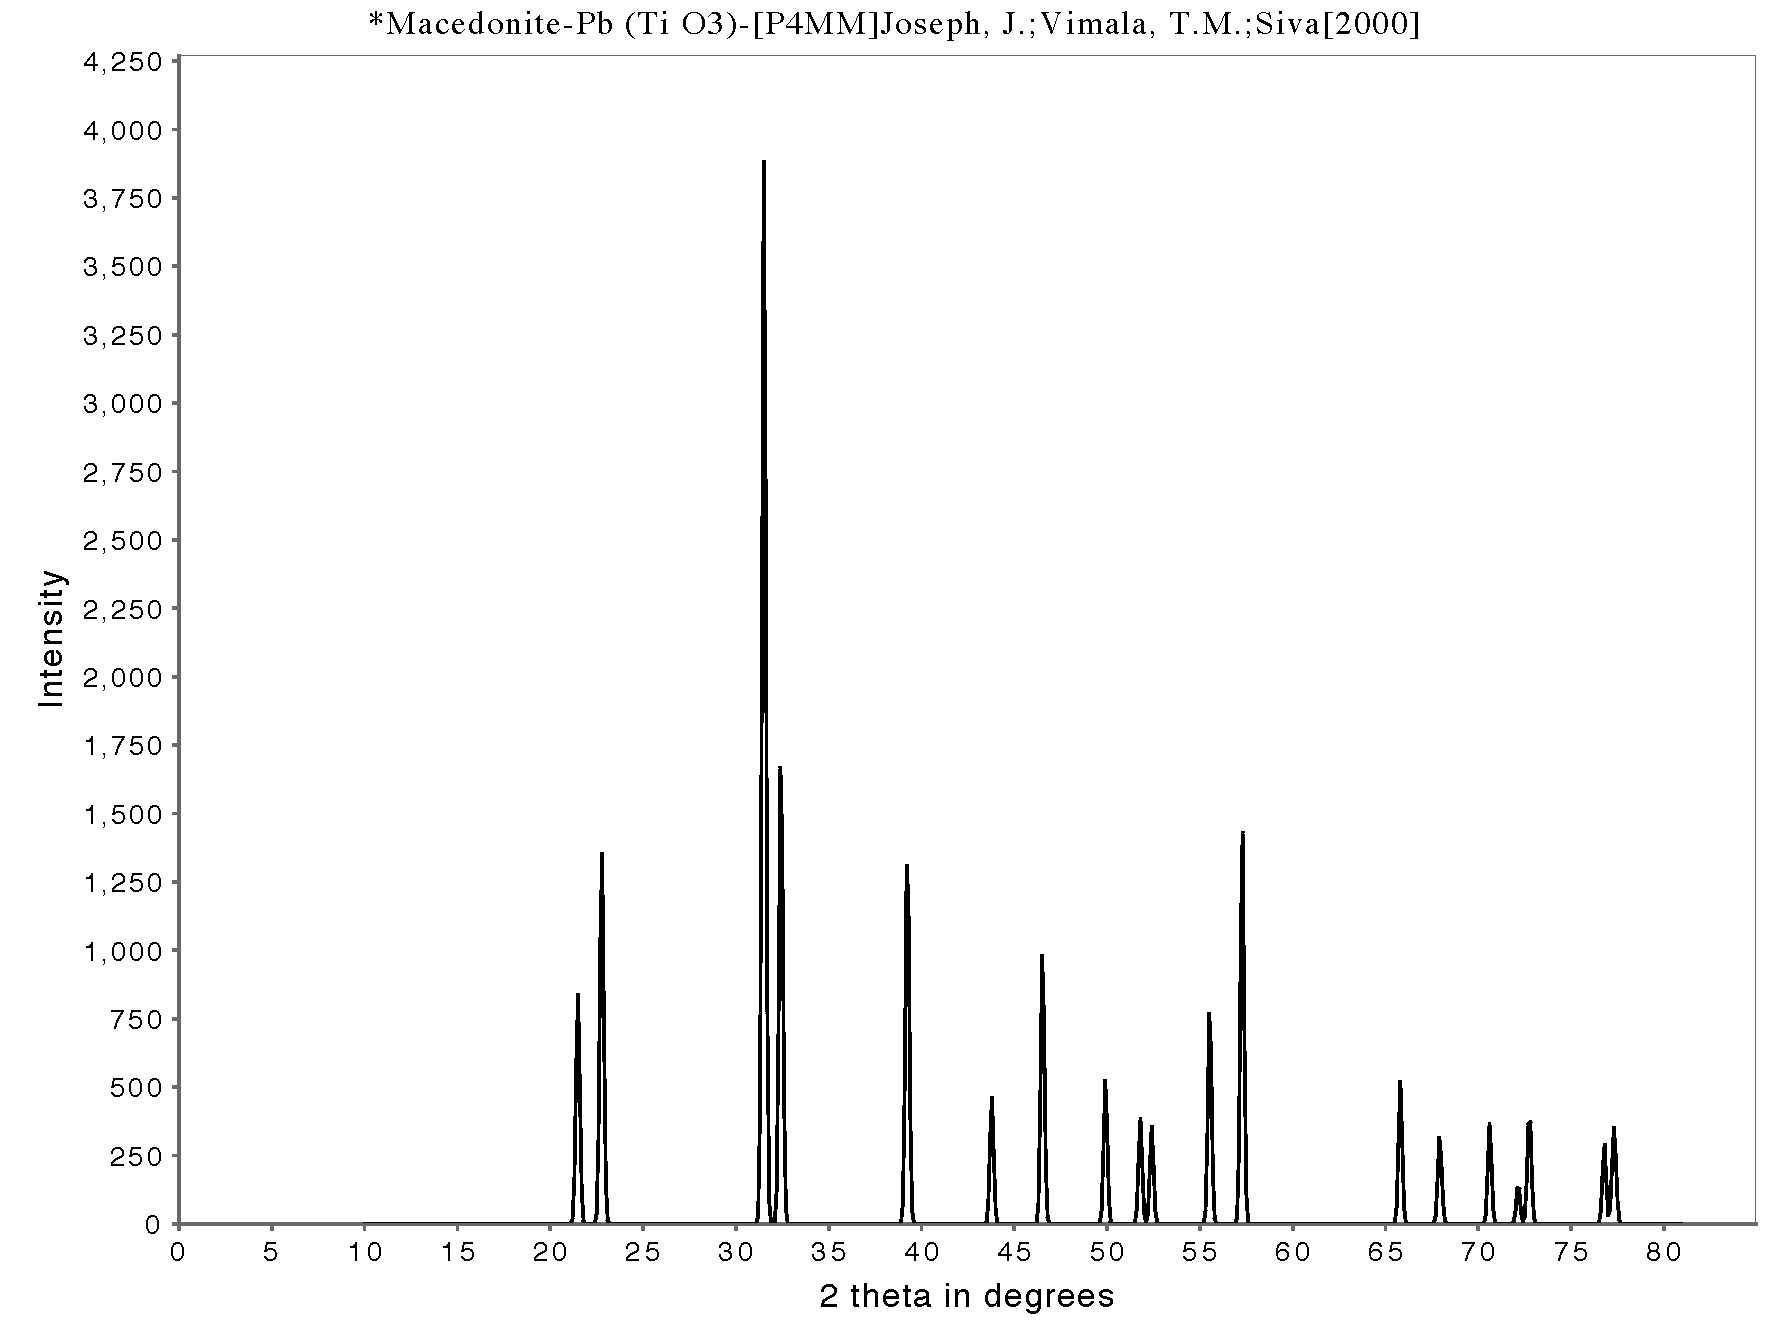

In [7]:
from IPython.display import Image, display
display(Image(filename=('./PbTiO3.png')))

This is not part of the question, but just to show the actual computed pattern after taking all factors into account, which shows much better agreement with the experimental pattern.

<module 'matplotlib.pyplot' from '/home/idies/anaconda3/envs/py2713/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

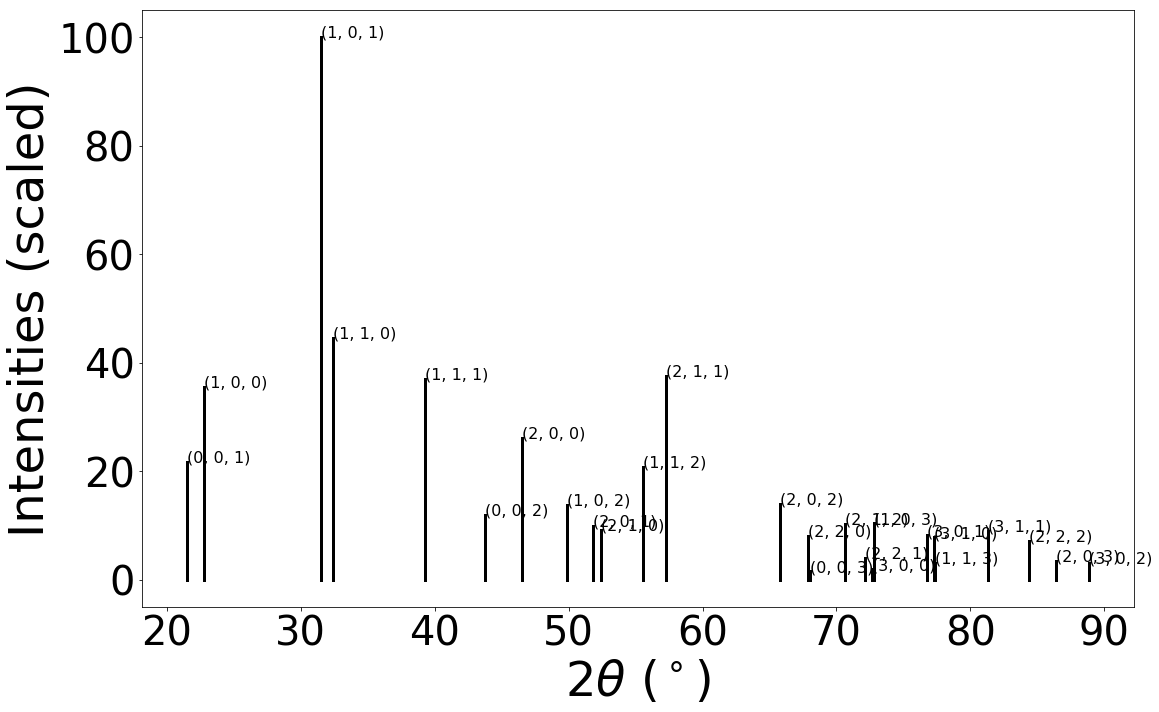

In [9]:
import pymatgen
from pymatgen.analysis.diffraction.xrd import XRDCalculator
%matplotlib inline

c = XRDCalculator()
c.get_xrd_plot(pymatgen.Structure.from_file("PbTiO3.cif"))